# Исследовательский анализ данных

**Цель работы:** изучение связи между признаками двумерного набора данных, визуализация данных.

## Описание предметной области

- Вариант №4
- Набор данных: <u>auto2.csv</u>
- Данные о подержанных авто:
1. имя
2. год
3. цена продажи
4. пройдено км
5. топливо
6. тип продавца
7. коробка передач
8. тип владельца

## 1. Чтение файла (набора данных)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("auto2.csv", sep=",")
df.head()

,Name,year,SellingPrice,kmdriven,fuel,seller_Type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


## 2. Обработка данных

### 2.1. Обработка столбцов

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4344 non-null   object 
 1   year          4344 non-null   int64  
 2   SellingPrice  4342 non-null   float64
 3   kmdriven      4343 non-null   float64
 4   fuel          4343 non-null   object 
 5   seller_Type   4344 non-null   object 
 6   transmission  4344 non-null   object 
 7   owner         4344 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.6+ KB


In [3]:
df.describe()

,year,SellingPrice,kmdriven
count,4344.000000,4.342000e+03,4343.000000
mean,2013.092311,5.039987e+05,66193.063320
std,4.214543,5.784465e+05,46636.648764
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
df.columns

Index(['Name', 'year', 'SellingPrice', 'kmdriven', 'fuel', 'seller_Type',
       'transmission', 'owner'],
      dtype='object')

In [111]:
df = df.rename(columns={'Name': 'name',
                        'SellingPrice': 'selling_price',
                        'kmdriven': 'km_driven',
                        'seller_Type': 'seller_type'})
df.columns

Index(['index', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

### 2.2. Обработка пропусков

In [98]:
print(df.describe(),'\n')

df['selling_price'] = df['selling_price'].fillna(0)
df['km_driven'] = df['km_driven'].fillna(0)
print(df.describe())

             index         year  selling_price      km_driven
count  3580.000000  3580.000000   3.580000e+03    3580.000000
mean   2085.669553  2012.962570   4.738199e+05   69216.257542
std    1255.710942     4.250437   5.092038e+05   47580.067918
min       0.000000  1992.000000   0.000000e+00       0.000000
25%    1023.500000  2010.000000   2.000000e+05   36000.000000
50%    2010.500000  2013.000000   3.500000e+05   60000.000000
75%    3192.250000  2016.000000   6.000000e+05   90000.000000
max    4342.000000  2020.000000   8.900000e+06  806599.000000 

             index         year  selling_price      km_driven
count  3580.000000  3580.000000   3.580000e+03    3580.000000
mean   2085.669553  2012.962570   4.738199e+05   69216.257542
std    1255.710942     4.250437   5.092038e+05   47580.067918
min       0.000000  1992.000000   0.000000e+00       0.000000
25%    1023.500000  2010.000000   2.000000e+05   36000.000000
50%    2010.500000  2013.000000   3.500000e+05   60000.000000
75%   

### 2.3. Обработка дубликатов

#### Явные дубликаты

In [7]:
display(df[df.duplicated()])
print(f"duplicates quantity: {df.duplicated().sum()}") 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4309,Datsun GO Plus T,2017,350000.0,10171.0,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000.0,41123.0,Diesel,Dealer,Manual,First Owner
4311,Toyota Camry Hybrid 2.5,2017,1900000.0,20118.0,Petrol,Dealer,Automatic,First Owner
4340,Renault KWID RXT,2016,225000.0,40000.0,Petrol,Individual,Manual,First Owner


duplicates quantity: 763


In [8]:
df = df.drop_duplicates().reset_index()
print(f"duplicates quantity: {df.duplicated().sum()}\n") 
df.info()  # Двойная Проверка удаления дубликатов
df = df.dropna()  # Удаление объекта с NaN атрибутом 'fuel'

duplicates quantity: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          3581 non-null   int64  
 1   name           3581 non-null   object 
 2   year           3581 non-null   int64  
 3   selling_price  3581 non-null   float64
 4   km_driven      3581 non-null   float64
 5   fuel           3580 non-null   object 
 6   seller_type    3581 non-null   object 
 7   transmission   3581 non-null   object 
 8   owner          3581 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 251.9+ KB


#### Неявные дубликаты

In [103]:
def display_implicit_duplicates():  # Инкапсулировано в функцию, чтобы применять несколько раз
    for col in df.columns:
        if col != 'index' and col != 'year' and col != 'km_driven' and col != 'selling_price':  # Выводим только информативные столбцы
            print(col, df[col].unique())

display_implicit_duplicates()

name ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
fuel ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type ['Individual' 'Dealer' 'Trustmark Dealer']
transmission ['Manual' 'Automatic']
owner ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [10]:
df['fuel'] = df['fuel'].replace('Petroll', 'Petrol')
df['seller_type'] = df['seller_type'].replace('Dealeer', 'Dealer')

display_implicit_duplicates()

name ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
fuel ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type ['Individual' 'Dealer' 'Trustmark Dealer']
transmission ['Manual' 'Automatic']
owner ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


### 2.4. Обработка типов данных

In [11]:
df['selling_price'] = df['selling_price'].astype('int64')
df['km_driven'] = df['km_driven'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          3580 non-null   int64 
 1   name           3580 non-null   object
 2   year           3580 non-null   int64 
 3   selling_price  3580 non-null   int64 
 4   km_driven      3580 non-null   int64 
 5   fuel           3580 non-null   object
 6   seller_type    3580 non-null   object
 7   transmission   3580 non-null   object
 8   owner          3580 non-null   object
dtypes: int64(4), object(5)
memory usage: 279.7+ KB


## 3. Построение графиков

### 3.1. Построение точечной диаграммы

Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными цветами).

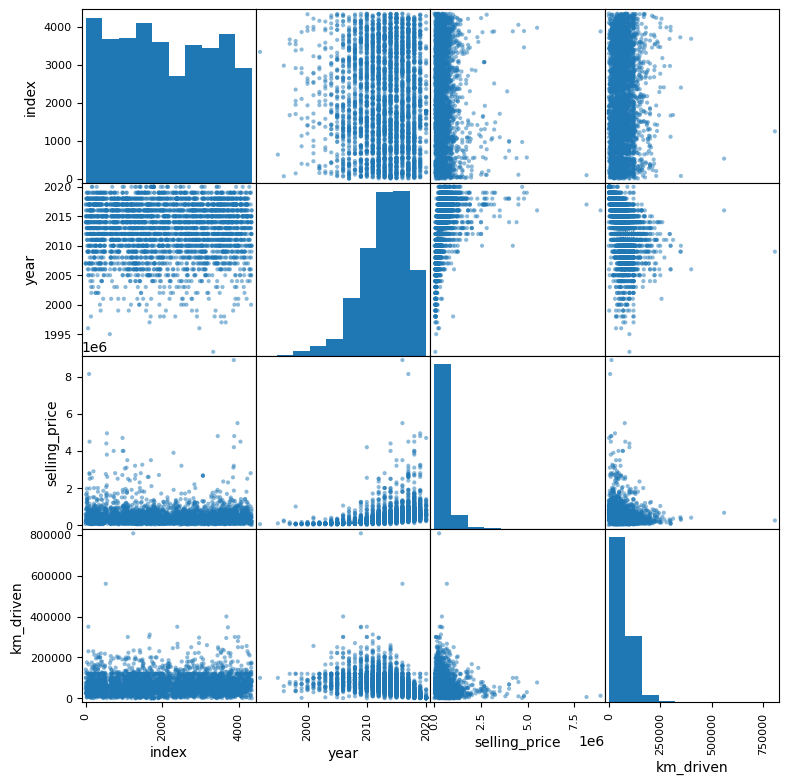

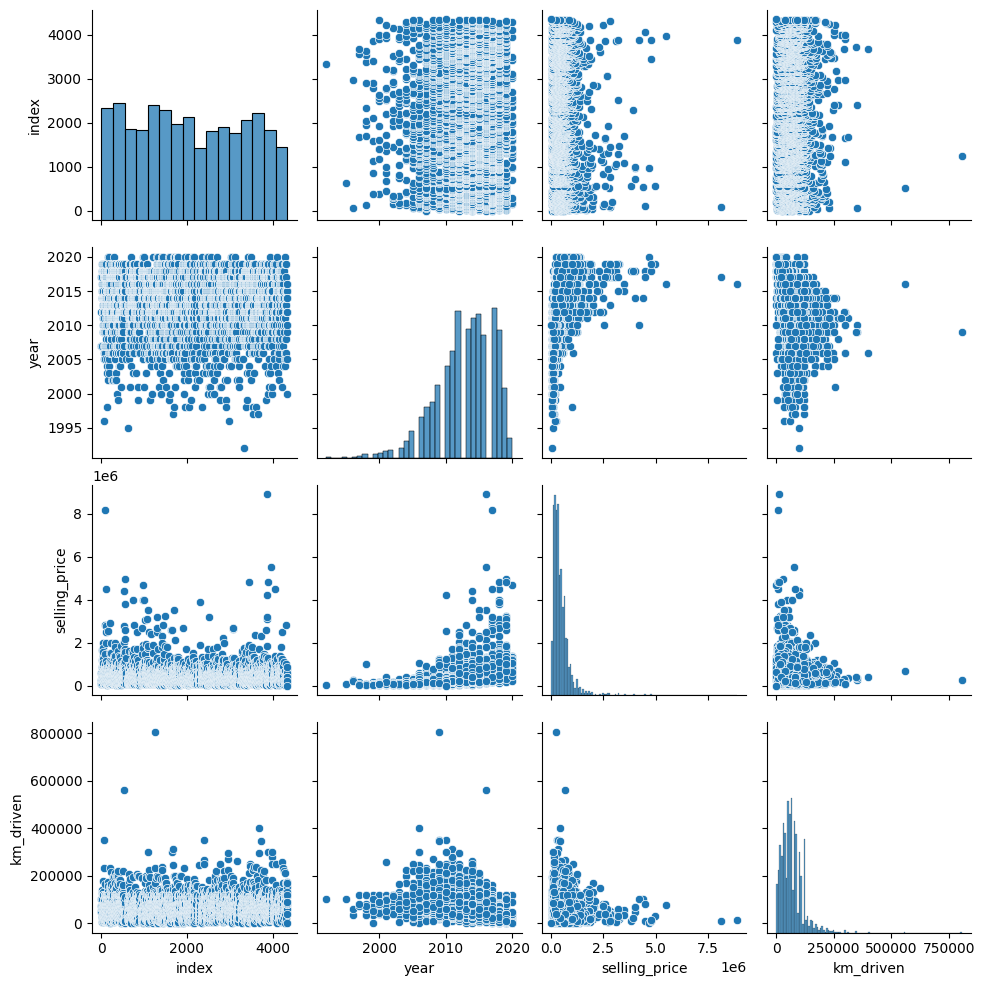

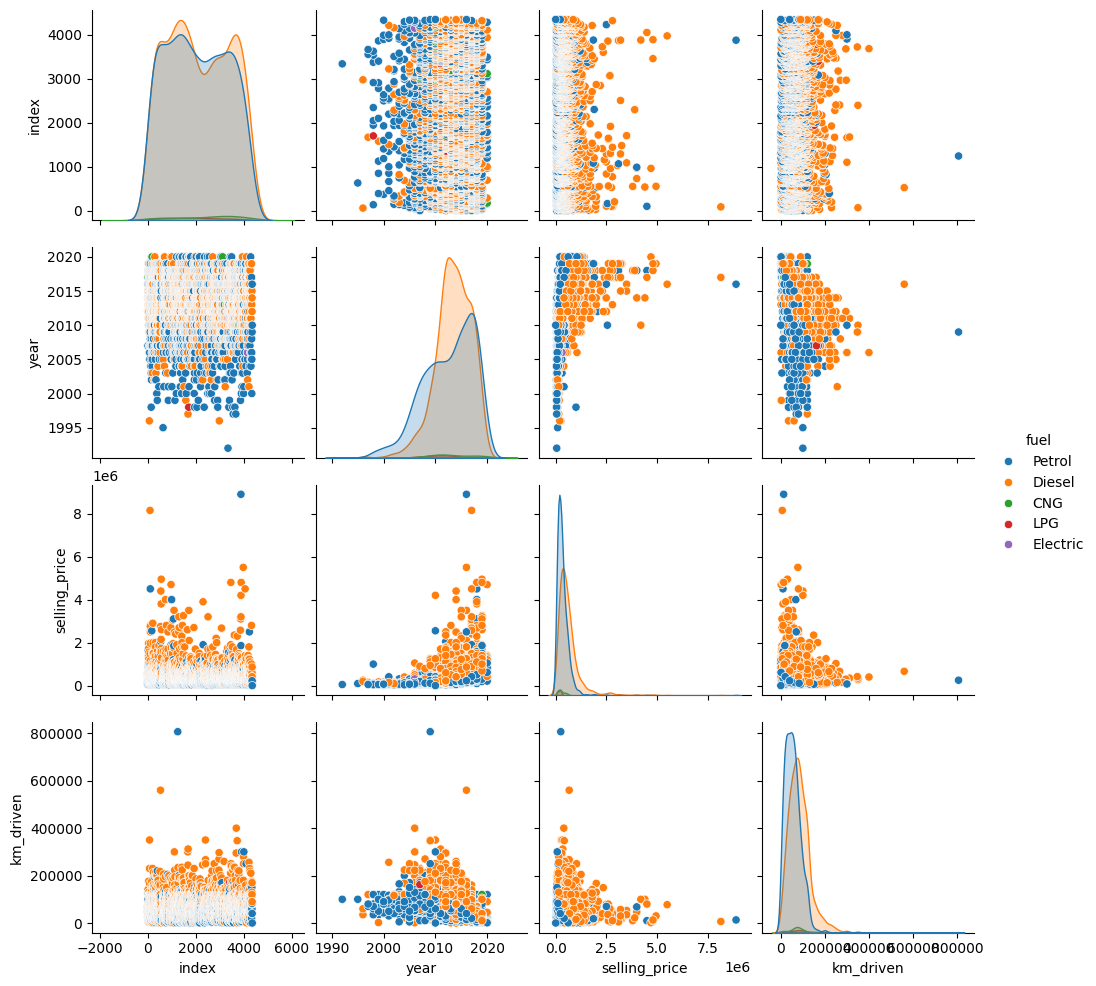

In [23]:
pd.plotting.scatter_matrix(df, figsize=(9, 9))
import seaborn as sns
sns.pairplot(df)
sns.pairplot(df[df.columns], hue='fuel')

**Выводы:** ...

### 3.2. Построение гистограммы

Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.

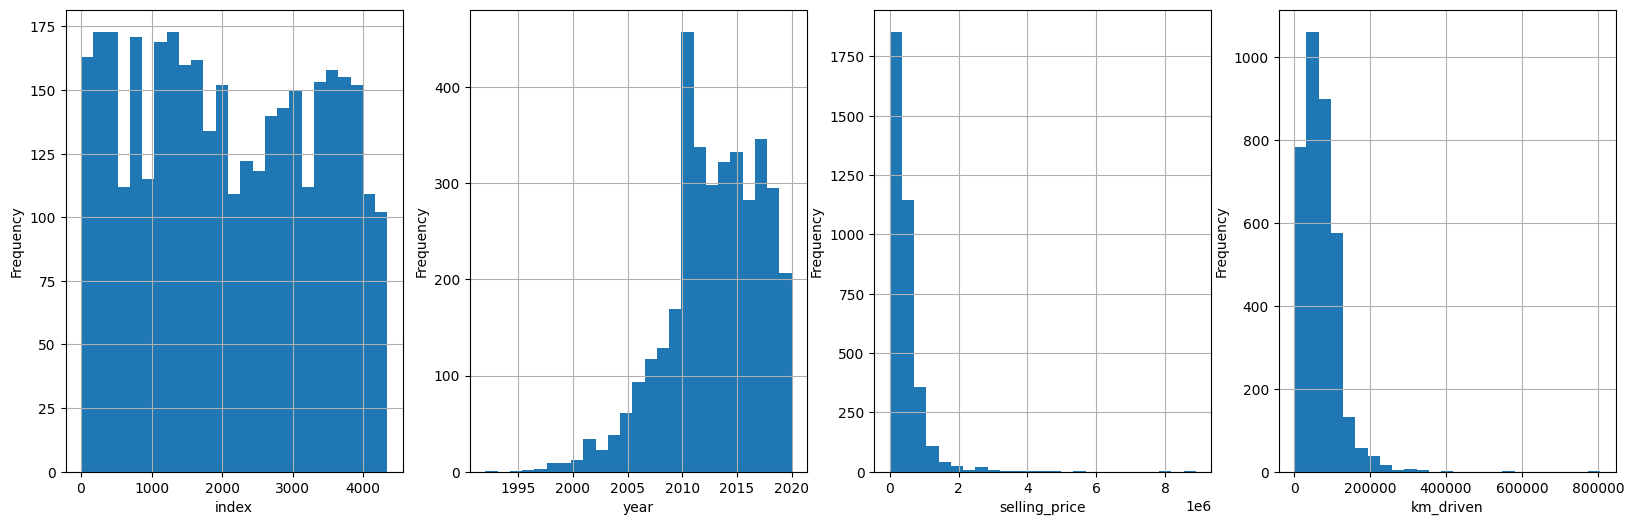

In [94]:
def is_col_int(col):
    return df[col].dtype == 'int64'

fig, axes = plt.subplots(
 1, # одна строка
 4,
 figsize=(20, 6) # размер графика
)

i = 0
for col in df.columns:  # Пробегаемся по всему списку колонок, ищем числовые и рисуме гистограммы только дял них
    if is_col_int(col):
        df[col].hist(bins=25, ax=axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        i += 1

**Выводы:** ...

### 3.3. Оценка коэффициента корреляции и ковариации

Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.

In [96]:
df.corr(numeric_only=True)

,index,year,selling_price,km_driven
index,1.000000,-0.003382,-0.023183,0.041752
year,-0.003382,1.000000,0.424367,-0.417123
selling_price,-0.023183,0.424367,1.000000,-0.187026
km_driven,0.041752,-0.417123,-0.187026,1.000000


**Выводы:** ...

## 4. Выполнение заданий

### 4.1. Задание 1

Использовать `seaborn`. По группировке - _'owner'_ и количество машин каждого типа коробки передач (_'transmission'_) построить диаграмму следующего вида: [task_1](../../../jupyter/lab2/task1.jpg)

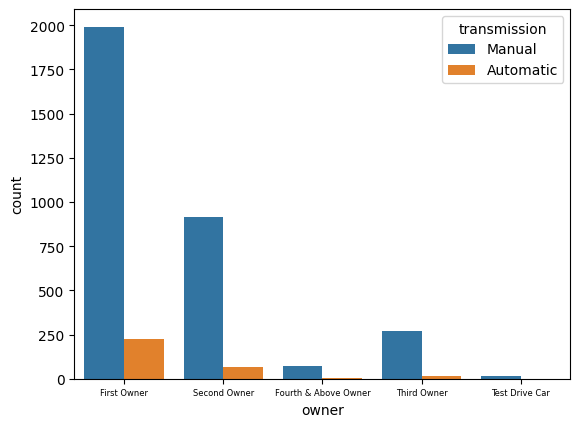

In [13]:
sns.countplot(x="owner", hue="transmission", data=df)
plt.xticks(fontsize=6)
plt.show()

**Выводы:** на данной гистограмме отображается соответствие между количеством элементов (машин), каждой категории владельца (_'owner'_), относительно атрибута типа трансмиссии (_'transmission'_). Автоматический счетчик производится с помощью `sns.countplot`, `plt` используется для работы с текстом, чтобы правильно организовать подписи объектов по оси абсцисс. 

### 4.2. Задание 2

Использовать `pandas` и `plot`. Отфильтровать набор данных и выбрать год выше 2005. По сводной таблице (pivot_table) - отобразить среднее количество пройденных километров (km_driven) по годам. Оставить только маркеры в виде ★ розового цвета размером 20. [task_2](../../../jupyter/lab2/task2.jpg)

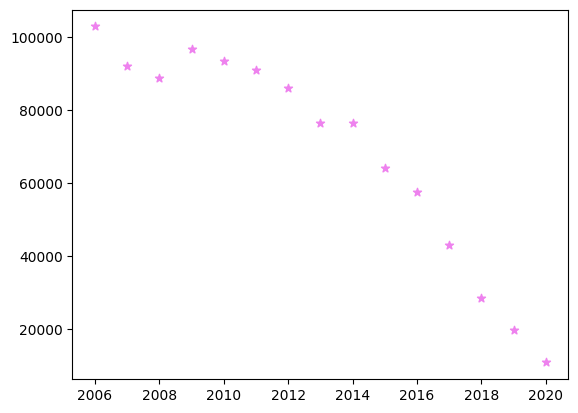

In [14]:
km_year_pivot = df[df['year'] > 2005].pivot_table(index='year', values='km_driven').reset_index()
plt.scatter(x=km_year_pivot['year'], y=km_year_pivot['km_driven'], marker='*', color='violet')

### 4.3. Задание 3

Использовать `matplotlib`. Построить круговую диаграмму, которая отображает процент каждого типа топлива (fuel). Можно убрать из диаграммы тип топлива, который встречается всего 1 раз. [task_3](../../../jupyter/lab2/task3.jpg)

Для более красивого отображения можно использовать `textprops={'size': 'x-large'}` и `legend(fontsize = 18, bbox_to_anchor=(1, 1))` и размер фигуры 20 на 8.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fuel    5 non-null      object
 1   count   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


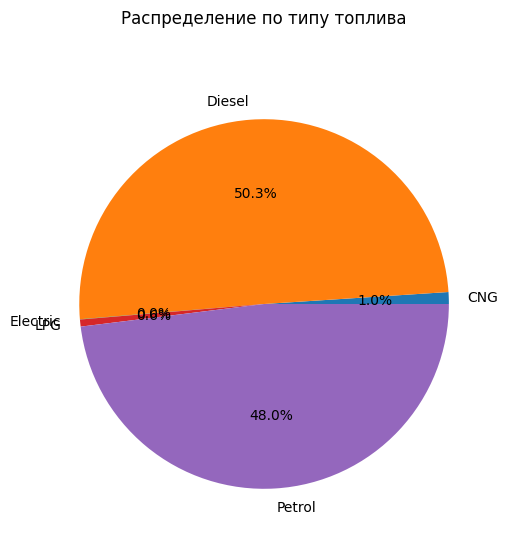

In [105]:
fig, ax = plt.subplots(figsize = (6,6))

fuel_count = df.groupby('fuel')['index'].count().reset_index().rename(columns={'index': 'count'})
fuel_count.info()

ax.pie(fuel_count['count'], labels=fuel_count['fuel'], autopct="%.1f%%")
ax.set_title("Распределение по типу топлива\n\n")
plt.show()

## 5. Выполнение графиков

### 5.1. Выполнение графика типа `hexagonal binning plot`

Выполните минимум один любой график типа `hexagonal binning plot`. Сделайте выводы.

<Axes: xlabel='selling_price', ylabel='km_driven'>

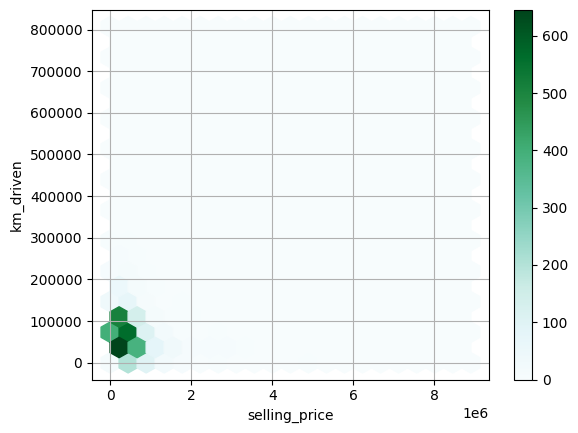

In [109]:
df.plot(x='selling_price', y='km_driven', kind='hexbin', gridsize=20, sharex=False, grid=True)

**Выводы:** ...

### 5.2. Выполнение графика типа `boxplot`

Выполните минимум один график типа `boxplot` для любого столбца. Сделайте выводы.

{'whiskers': [<matplotlib.lines.Line2D at 0x1b730205100>,
 'caps': [<matplotlib.lines.Line2D at 0x1b72d9e1ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b72de8dcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b72d9e2420>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b72d9e2090>],
 'means': []}

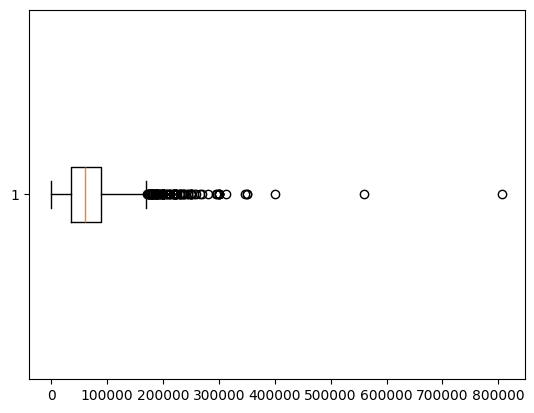

In [117]:
plt.boxplot(df['km_driven'], vert=False)

**Выводы:** ...

### 5.3. Добавление категории по числовому столбцу

Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте `boxplot` по этому числовому столбцу по каждой новой категории (на `boxplot` будет box-ы для средней, низкой и высокой зарплаты).

In [18]:
...

Ellipsis

**Выводы:** ...

### 5.4. Выполнение графиков `boxplot` по категориям

Выполните ещё минимум 2 графика `boxplot` по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.

In [19]:
...

Ellipsis

**Выводы:** ...

## Выводы:

В ходе лабораторной работы ...